Sebastian Yepes Acevedo

Cc:1007448816

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")


# 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Llenamos los datos nulos de la columna total_bedrooms utilizando la mediana.

In [6]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

/tmp/ipython-input-1590527289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


# 3)

In [7]:
unique_ocean_proximity = df["ocean_proximity"].unique()
display(unique_ocean_proximity)

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# 4)

In [8]:
cols = ["housing_median_age",   "total_rooms",  "total_bedrooms",   "population",   "households",   "median_income",    "median_house_value"]

promedio = df.groupby("ocean_proximity")[cols].mean()
display(promedio)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,545.293892,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.051443,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,513.491266,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,537.446200,1354.008653,501.244545,4.005785,249433.977427


# 5)

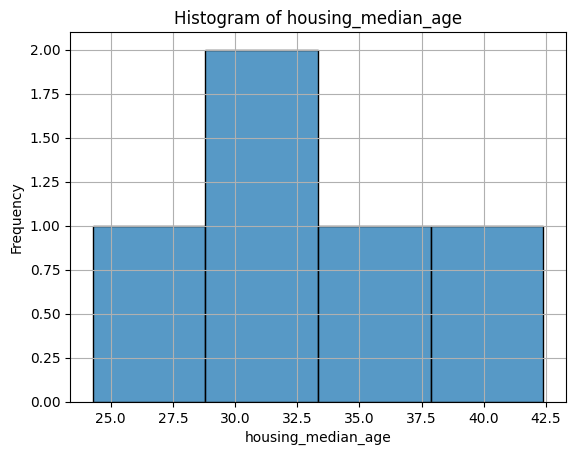

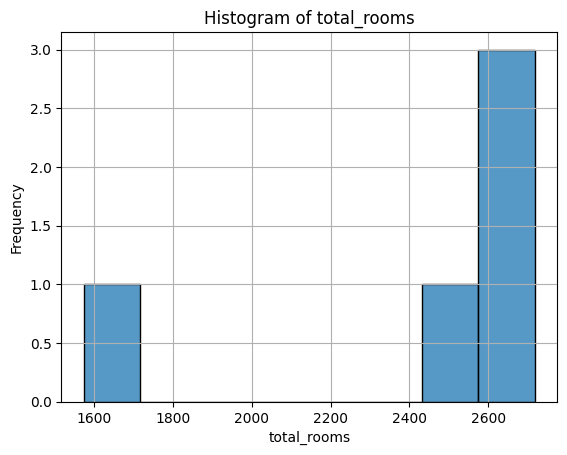

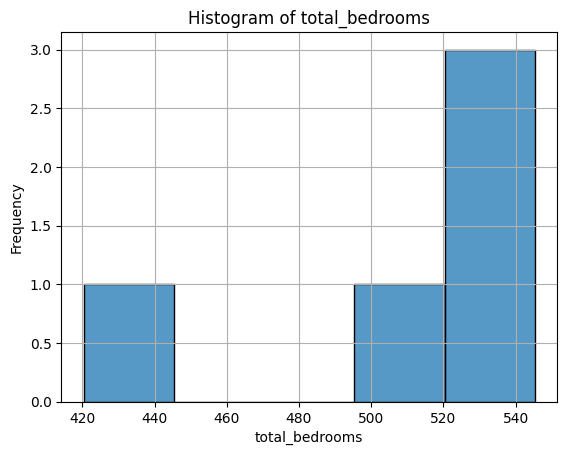

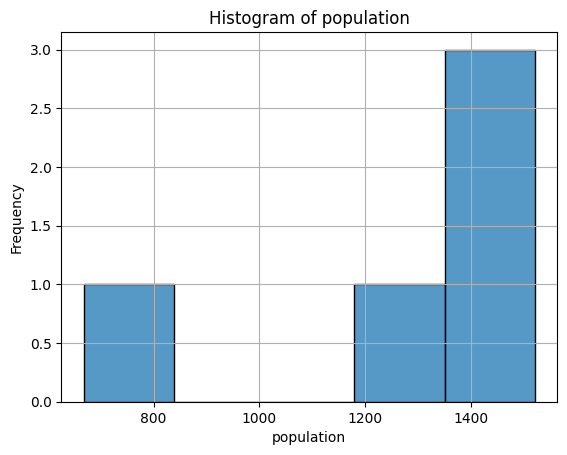

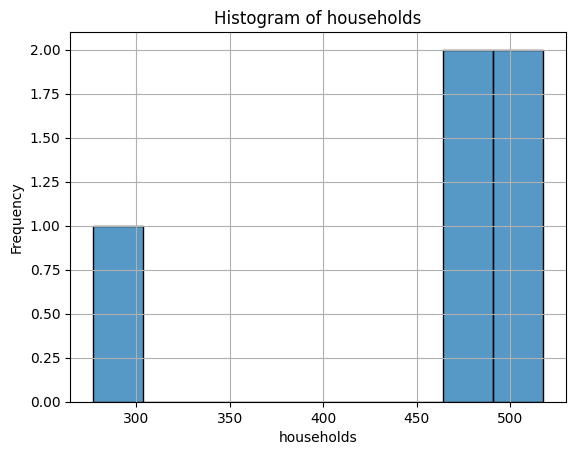

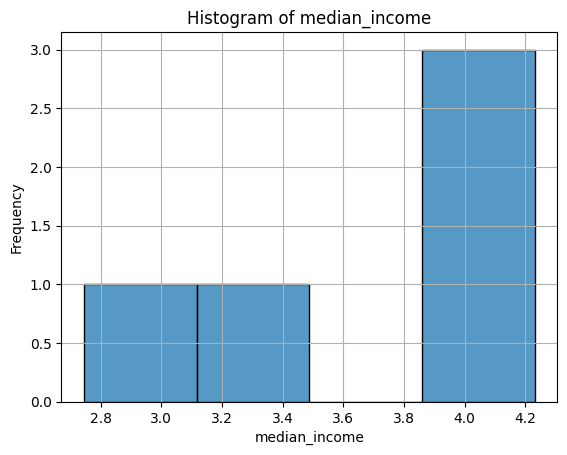

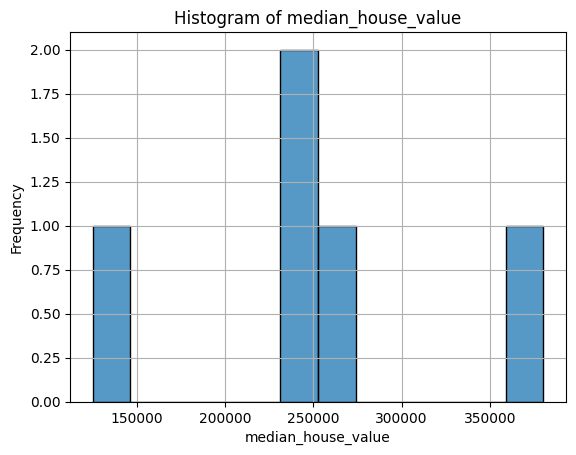

In [9]:
for col in promedio.columns:
  plt.figure()
  sns.histplot(data=promedio, x=col)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.grid()
  plt.show()

# 7)

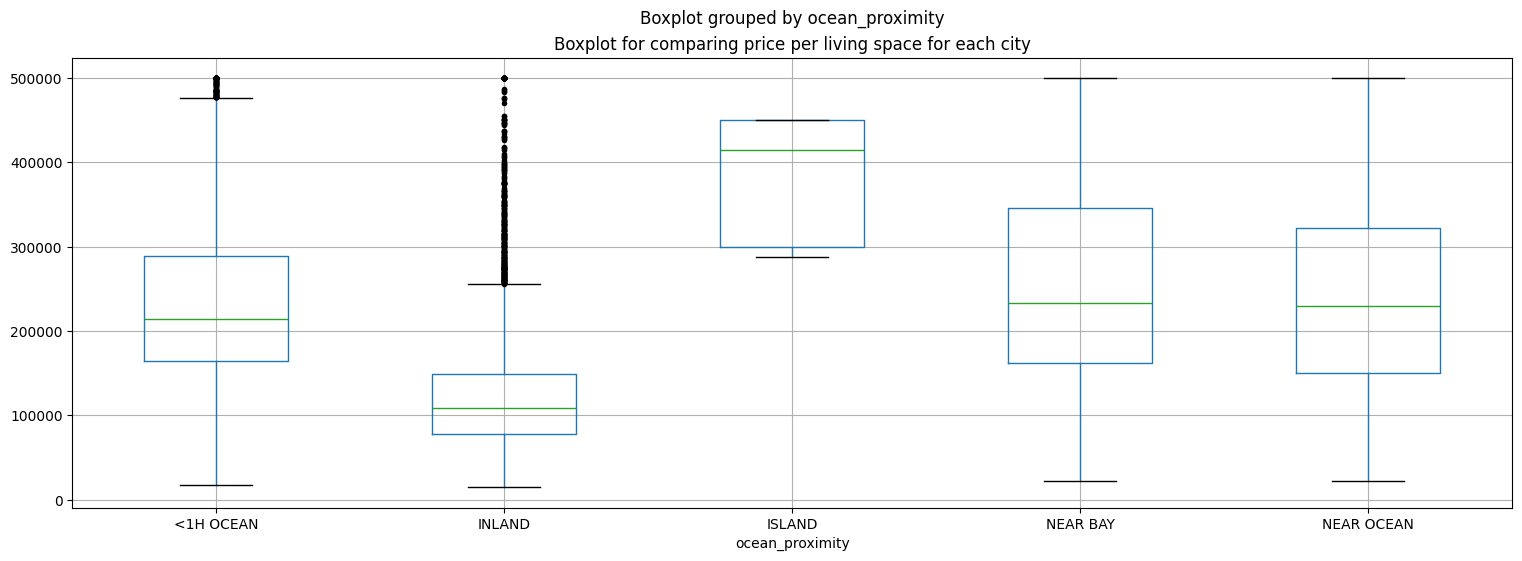

In [10]:
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))

plt.title('Boxplot for comparing price per living space for each city')
plt.show()

# 8)

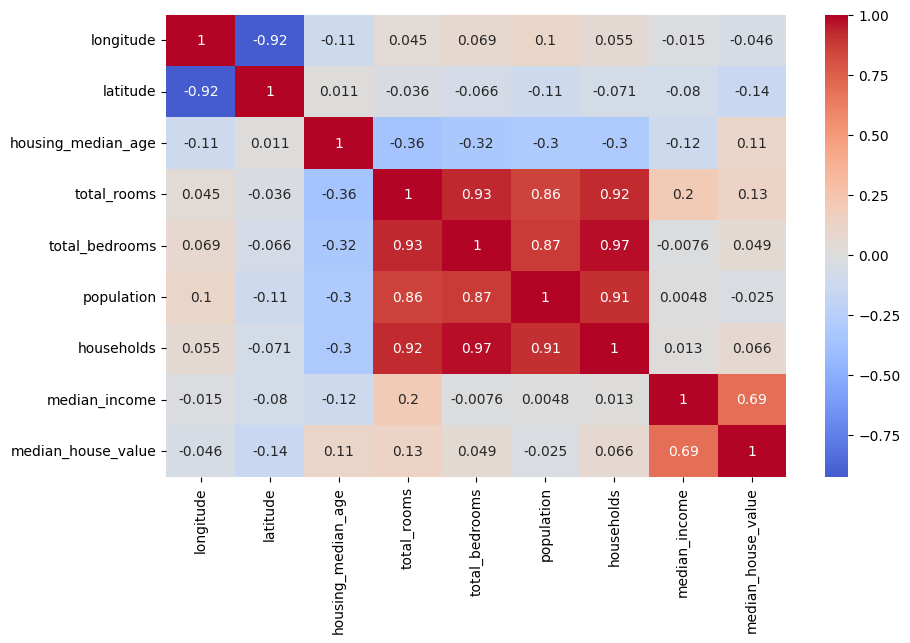

In [11]:
corr_matrix = df.drop('ocean_proximity', axis=1).corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

# 9)

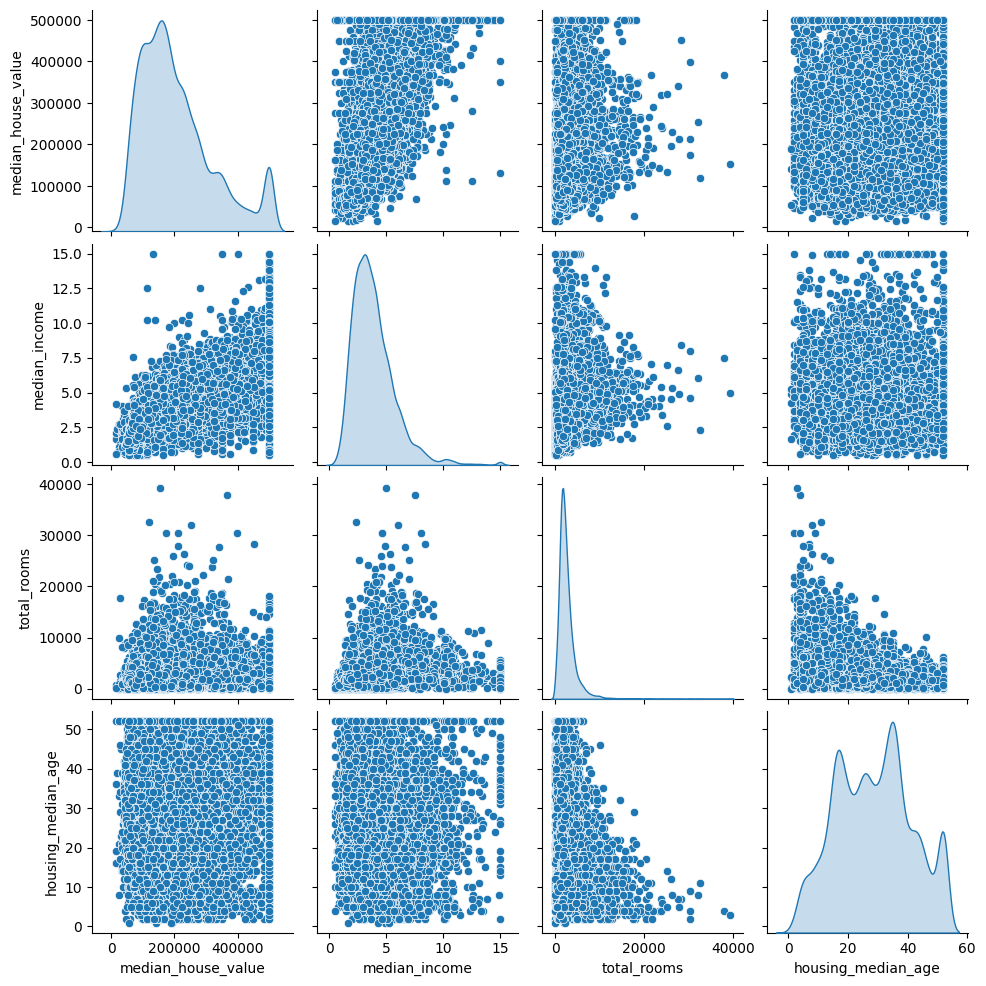

In [12]:
cols2 = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

sns.pairplot(df[cols2], diag_kind='kde')
plt.show()

# 10)

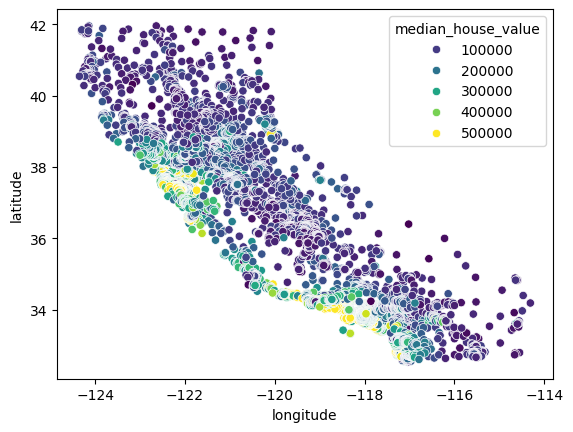

In [13]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='viridis')
plt.show()

# 11)

In [14]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


No se está manejando una muestra significativa. A pesar de que las lineas son correctas, se puede estar cayendo en un sesgo de muestreo o sampling bias, debido a que "median_income" está correlaccionada con "median_house_vlaue".

Como se puede observar se obtienen distribuciones diferentes de train y test, indiciendo así un sesgo.

# 12)

<Axes: >

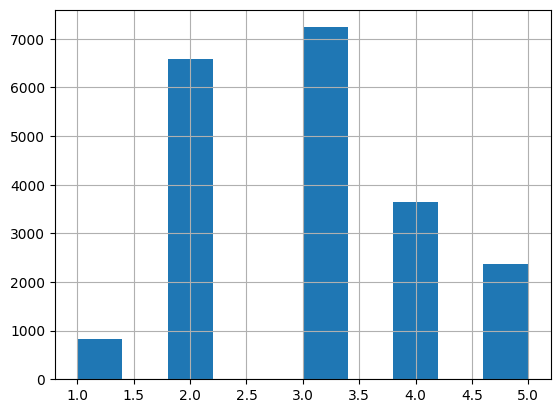

In [15]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]


In [17]:
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

,count
income_cat,
3,0.348716
2,0.324188
4,0.173147
5,0.114159
1,0.039789


Obtenemos como resultado una división aleatoria simple evitando sesgos. Se mejora la validez estadistica de los resultados y se obtienen métricas comparables y representativas de la población.

Este análisis permite mantener el conjunto en las mismas proporciones del data set completo.

In [18]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

# 13)

In [19]:
df_train = strat_train_set.copy()
df_test  = strat_test_set.copy()

df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]

df_test["rooms_per_household"] = df_test["total_rooms"] / df_test["households"]
df_test["bedrooms_per_room"] = df_test["total_bedrooms"] / df_test["total_rooms"]
df_test["population_per_household"] = df_test["population"] / df_test["households"]


# 14)

In [20]:
df.isnull().sum()



median = df["total_bedrooms"].median()
q=df["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

,0
total_bedrooms,0


In [21]:
from sklearn.impute import SimpleImputer


df_train_num = df.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.36838857e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05,  3.00668605e+00])

In [22]:

df_train_num = df_train.select_dtypes(include=["int64", "float64"])

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_train_num)

print("Media (SimpleImputer):")
print(imp_mean.statistics_)

print("\nMediana:")
print(df_train_num.median())


Media (SimpleImputer):
[-1.19575635e+02  3.56393144e+01  2.86534036e+01  2.62253979e+03
  5.33958576e+02  1.41968738e+03  4.97011810e+02  3.87588428e+00
  2.07005322e+05  5.44040595e+00  2.13711191e-01  3.09646921e+00]

Mediana:
longitude                     -118.510000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2119.000000
total_bedrooms                 435.000000
population                    1164.000000
households                     408.000000
median_income                    3.541550
median_house_value          179500.000000
rooms_per_household              5.232342
bedrooms_per_room                0.203059
population_per_household         2.817661
dtype: float64


In [23]:
df_train["rooms_per_household"] = df_train["total_rooms"] / df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"] / df_train["total_rooms"]
df_train["population_per_household"] = df_train["population"] / df_train["households"]

df_train_num = df_train.select_dtypes(include=["int64", "float64"])

imp_mean = SimpleImputer(strategy="mean")
imp_mean.fit(df_train_num)

X = imp_mean.transform(df_train_num)

housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,0.182692,3.167241


# 15)

In [24]:
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


las primeras lineas de código crean un nuevo dataframe que solo contiene la columna "Ocean_proximity", manteniendo el formato del dataframe.

Luego, al usar el encoder, se codficia para scikit y especificamos que queremos una matriz completa de numpy y no una dispersa.

Finalmente se transforma la información de texto a números. Comenzando con fit_transform para dar las categorías y generar la fila de números binarios.

Obtenemos así un dataframe númerico que representa la información categórica de "ocean_proximity"

# 16)

Las variables se pueden escalar usando lo siguiente:

In [25]:
cols=["longitude", "latitude",  "housing_median_age",   "total_rooms",\
      "total_bedrooms", "population",   "households",   "median_income",\
      "<1H OCEAN",  "INLAND",   "ISLAND",   "NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

# 17)

In [26]:
url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(url)

df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


for dataset in (strat_train_set, strat_test_set):
    dataset.drop("income_cat", axis=1, inplace=True)


for dataset in (strat_train_set, strat_test_set):
    dataset["rooms_per_household"] = dataset["total_rooms"] / dataset["households"]
    dataset["bedrooms_per_room"] = dataset["total_bedrooms"] / dataset["total_rooms"]
    dataset["population_per_household"] = dataset["population"] / dataset["households"]


housing_train_labels = strat_train_set["median_house_value"].copy()
housing_test_labels = strat_test_set["median_house_value"].copy()

housing_train = strat_train_set.drop("median_house_value", axis=1)
housing_test = strat_test_set.drop("median_house_value", axis=1)


num_attribs = housing_train.drop("ocean_proximity", axis=1)
cat_attribs = housing_train[["ocean_proximity"]]


imputer = SimpleImputer(strategy="median")
housing_train_num = pd.DataFrame(imputer.fit_transform(num_attribs),
                                 columns=num_attribs.columns,
                                 index=num_attribs.index)

housing_test_num = pd.DataFrame(imputer.transform(housing_test.drop("ocean_proximity", axis=1)),
                                columns=num_attribs.columns,
                                index=housing_test.index)

cat_encoder = OneHotEncoder(sparse_output=False)
housing_train_cat = pd.DataFrame(cat_encoder.fit_transform(cat_attribs),
                                 columns=cat_encoder.get_feature_names_out(["ocean_proximity"]),
                                 index=housing_train.index)

housing_test_cat = pd.DataFrame(cat_encoder.transform(housing_test[["ocean_proximity"]]),
                                columns=cat_encoder.get_feature_names_out(["ocean_proximity"]),
                                index=housing_test.index)


housing_train_full = housing_train_num.join(housing_train_cat)
housing_test_full = housing_test_num.join(housing_test_cat)


scaler = MinMaxScaler()
housing_train_scaled = pd.DataFrame(scaler.fit_transform(housing_train_full),
                                    columns=housing_train_full.columns,
                                    index=housing_train_full.index)

housing_test_scaled = pd.DataFrame(scaler.transform(housing_test_full),
                                   columns=housing_test_full.columns,
                                   index=housing_test_full.index)


housing_train_scaled["median_house_value"] = housing_train_labels
housing_test_scaled["median_house_value"] = housing_test_labels


housing_train = housing_train_scaled
housing_test = housing_test_scaled

print("housing_train shape:", housing_train.shape)
print("housing_test shape:", housing_test.shape)
print("\nColumnas finales:", housing_train.columns.tolist())
housing_train.head()

housing_train shape: (16512, 17)
housing_test shape: (4128, 17)

Columnas finales: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'median_house_value']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.030938,0.117537,0.001993,0.0,1.0,0.0,0.0,0.0,72100.0
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.041176,0.067460,0.001554,0.0,0.0,0.0,0.0,1.0,279600.0
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.030281,0.101772,0.001232,0.0,1.0,0.0,0.0,0.0,82700.0
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.019575,0.196117,0.000939,0.0,0.0,0.0,0.0,1.0,112500.0
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.035276,0.091880,0.001992,1.0,0.0,0.0,0.0,0.0,238300.0


In [27]:
housing_train.shape[0] + housing_test.shape[0] == df.shape[0]

True

# 18)

El modelo muestra que nuna preparación cuidadosa del dataset maneja una gran importancia para garantizar un modelo robusto, interpretable y capaz de generalizar correctamente a datos nuevos y con ello obteniendo mejores resultados al combinar una buena implementación de atributos y un modelo flexible.

# 19)
Es valido como aproximación inicial o como base, pero no logra capturar completamente el fenómeno.

En sí, permitiría analizar rapidamente las variables del dataframe y manejar una buena linea base. Sin embargo, no se captaría completamente relaciones que no fuesen lineales, además del manejo de un error alto en zonas con precios extremos.

Finalmente podemos decir que el modelo es valido, desde un punto de vista más simple y en caso de querer realizarsse una referencia inicial a los datos.


# 20)
El escore devuelve el valor del cociente de determinación, donde 1.0 es el valor de un ajuste perfecto, 0.8-0.9 un ajuste muy bueno respecto a las variaciones y los demás valores representarían desde un ajuste moderado hasta un ajuste donde el modelo es muy malo.


# 21)

Sí, al manejar la regresión lineal como una primera aproximación, podemos tener otros modelos para tener en cuenta otro tipo de relaciones presentes en el dataset.

Un ejemplo puede ser el modelo de random forest, el cual sí puede tener en cuenta la complejidad que se manejan en por ejemplo los precios de vivienda.

# 22)


Sí, podemos partir las tareas usando:

Un Pipeline numérico

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


Un Pipeline categórico

In [31]:
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


Combinación de los tipos de dato

In [32]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
                "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

full_preprocess = ColumnTransformer([
    ("num", numeric_pipeline, num_attribs),
    ("cat", categorical_pipeline, cat_attribs)
])


Incluir el modelo

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = Pipeline([
    ("preprocessor", full_preprocess),
    ("regressor", LinearRegression())
])


Finalmente aplicar el entrenamiento

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Cargar los datos
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")

# Dividir en entrenamiento y prueba
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Variables predictoras y objetivo
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"]
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"]

# Entrenamiento del pipeline completo
model.fit(X_train, y_train)

# Predicciones y score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


R²: 0.625
RMSE: 70059.19
